In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import randint, norm
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Regressor nur mit weird values

In [22]:
from sklearn.preprocessing import MinMaxScaler

spotify = pd.read_csv('./assets/spotify_songs.csv')

spotify = spotify.drop(
    columns=["track_id", "track_name", "track_artist", "track_album_id", "track_album_name", "playlist_name",
             "playlist_id", "playlist_genre", "playlist_subgenre", "track_album_release_date"])

scaler = MinMaxScaler()
spotify = pd.DataFrame(scaler.fit_transform(spotify), columns=spotify.columns)

spotify.sample(10)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16824,0.37,0.852492,0.534919,0.909091,0.857029,1.0,0.175381,0.182093,0.000021,0.105422,0.672048,0.417750,0.251455
13412,0.10,0.393693,0.374891,0.818182,0.745888,1.0,0.038671,0.206237,0.006509,0.081024,0.507568,0.210717,0.563035
16717,0.70,0.511699,0.753957,0.636364,0.897136,1.0,0.046187,0.265594,0.000059,0.298193,0.602422,0.486652,0.355676
24717,0.02,0.737538,0.445903,0.272727,0.782662,0.0,0.083878,0.035614,0.000015,0.313253,0.781029,0.394266,0.465853
15643,0.00,0.566633,0.957993,0.181818,0.876265,1.0,0.073965,0.001157,0.006388,0.069076,0.404642,0.555555,0.450542
2257,0.18,0.577823,0.685945,1.000000,0.870587,0.0,0.098366,0.133803,0.000000,0.110442,0.403633,0.619337,0.398461
28964,0.67,0.495422,0.728953,0.181818,0.830480,1.0,0.295207,0.054125,0.000004,0.441767,0.218971,0.380254,0.673634
23418,0.59,0.785351,0.589928,0.545455,0.827505,1.0,0.199346,0.092254,0.000000,0.101406,0.749748,0.350810,0.455941
11079,0.07,0.665310,0.526917,0.363636,0.840140,0.0,0.036383,0.553320,0.000003,0.109438,0.115035,0.476186,0.522833
0,0.66,0.760936,0.915985,0.545455,0.918090,1.0,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254


In [23]:
X = spotify.drop(columns='track_popularity')
y = spotify.track_popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

forest_cv = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions={'n_estimators': n_estimators,
                         'max_features': max_features,
                         'max_depth': max_depth},
    n_jobs=-1,
    cv=5,
    verbose=999,
    scoring='neg_mean_squared_error',
)

forest_cv.fit(X_train, y_train)
forest_cv.score(X_test, y_test)

predictions = forest_cv.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File 

20.804833059200156

In [10]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

predictions = forest.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

21.048655021423464

In [24]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

predictions = svr.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

0.23958833969512852

In [12]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

predictions = gbr.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

23.498863986026354

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

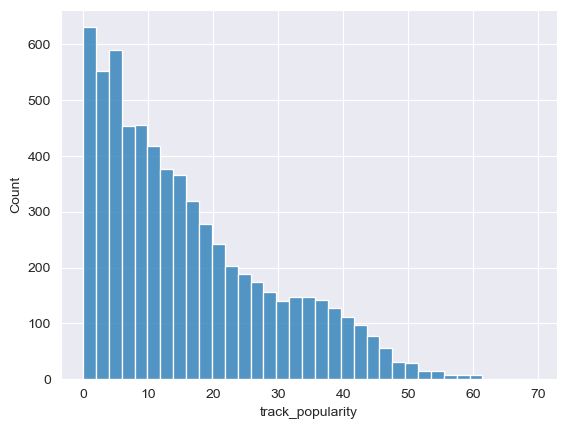

In [16]:
y_pred = forest_cv.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

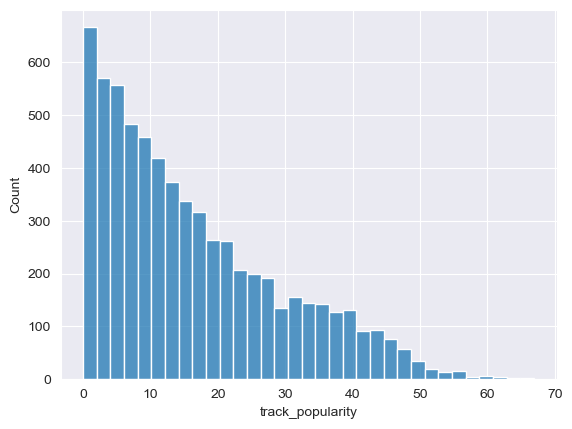

In [13]:
y_pred = forest.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

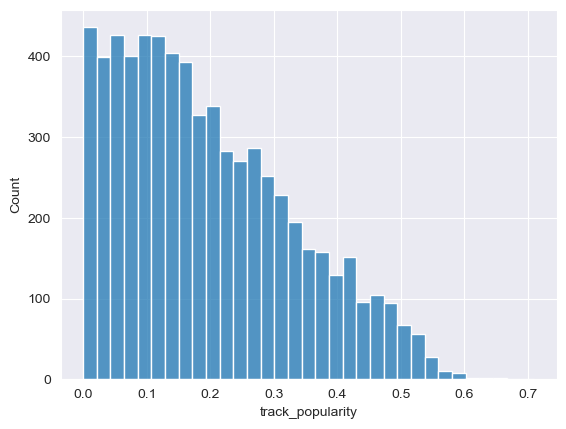

In [25]:
y_pred = svr.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

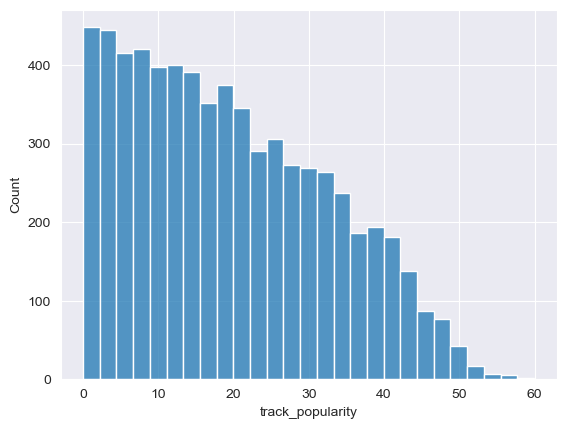

In [15]:
y_pred = gbr.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)

In [30]:
from matplotlib import pyplot as plt

# Calculate the absolute error
error = np.abs(y_test - y_pred)

# Create a colormap based on the popularity values
cmap = sns.color_palette("viridis", as_cmap=True)  # You can choose any colormap you prefer

# Plot the histogram with colored bins based on popularity
sns.histplot(error, bins=20, palette=cmap, weights=y_test, legend=False)

# Add color bar to show the mapping between popularity and colors
plt.colorbar(label='Popularity')

plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `weights`

In [28]:
X_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
28812,0.663276,0.750956,0.545455,0.798797,0.0,0.040196,0.112676,0.595573,0.102410,0.040262,0.509622,0.455378
24610,0.582909,0.849974,0.090909,0.871613,0.0,0.359477,0.031891,0.000000,0.052309,0.698285,0.776019,0.542743
15250,0.601221,0.744955,0.727273,0.825661,0.0,0.046187,0.418511,0.003541,0.876506,0.396569,0.525639,0.613742
21710,0.559512,0.403896,0.000000,0.706012,0.0,0.043355,0.443662,0.000221,0.110442,0.331988,0.563882,0.527354
19290,0.768057,0.719951,0.090909,0.884961,0.0,0.089978,0.350101,0.000000,0.168675,0.719475,0.734756,0.357122
...,...,...,...,...,...,...,...,...,...,...,...,...
8858,0.661241,0.887980,0.636364,0.866647,1.0,0.350763,0.662978,0.000045,0.105422,0.343088,0.384042,0.297853
20582,0.704985,0.893981,1.000000,0.809610,1.0,0.058388,0.026761,0.210262,0.059940,0.780020,0.496329,0.690138
16337,0.720244,0.708949,0.818182,0.814974,1.0,0.051416,0.585513,0.000519,0.071988,0.970737,0.401128,0.422351
26578,0.556460,0.429900,0.181818,0.818369,1.0,0.072658,0.853119,0.616700,0.082831,0.176589,0.479156,0.347340
